In [1]:
from tqdm import tqdm
import numpy as np
import scipy
import requests

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = dict()

for mixture in tqdm([
    f"Ar_{100-fraction:0.1f}-C4H10_{fraction:0.1f}" for fraction in np.arange(0.5, 20.5, 0.5)
]):
    url = f"https://lobis.github.io/gas-files/mixtures/Ar-C4H10/{mixture}.gas.json"
    r = requests.get(url)
    data[mixture] = r.json()

100%|██████████| 40/40 [00:01<00:00, 22.21it/s]


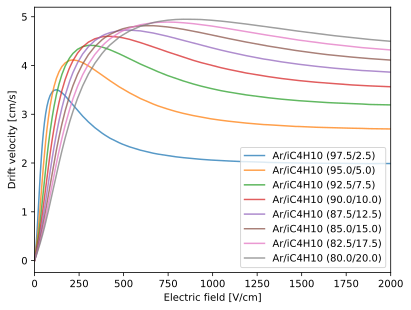

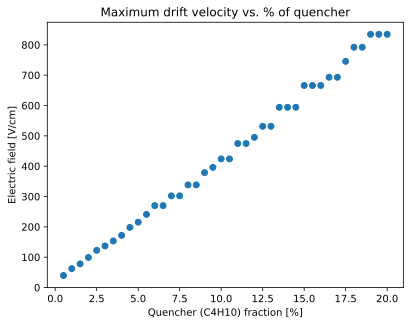

In [3]:
def mixture_string_to_label(gas):
    components = gas["components"]
    fractions = [f"{x * 100:0.1f}" for x in components["fractions"]]
    labels = [label for label in components["labels"]]
    return f"""{"/".join(labels)} ({"/".join(fractions)})"""

max_drift_velocity_efield = dict()
for mixture, gas in data.items():
    components = gas["components"]
    x = gas["electric_field"]
    y = gas["electron_drift_velocity"]
    peaks, _ = scipy.signal.find_peaks(y, distance=100)
    efield_peak = x[peaks[0]]
    max_drift_velocity_efield[mixture] = efield_peak
    if components["fractions"][0] * 100 % 2.5 != 0:
        # do not plot all
        continue
    plt.plot(x, y, label=mixture_string_to_label(gas), alpha=0.75)

plt.xlabel("Electric field [V/cm]")
plt.ylabel("Drift velocity [cm/s]")
plt.xlim(0, 2000)
plt.legend()
plt.show()

# plot max drift velocity vs % of quencher

fractions = [data[mixture]["components"]["fractions"]
             [1] * 100 for mixture in max_drift_velocity_efield]

plt.plot(fractions, max_drift_velocity_efield.values(),
         "o", label=mixture_string_to_label(data[mixture]))

plt.title("Maximum drift velocity vs. % of quencher")
plt.ylabel("Electric field [V/cm]")
plt.xlabel("Quencher (C4H10) fraction [%]")
plt.show()